## Crop and Fertilizer 

In [27]:
# Importing Nessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
crop=pd.read_csv("dataset/Crop_recommendation.csv")

In [3]:
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.tail()


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop.shape

(2200, 8)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:

# to check dedicated values
crop.duplicated().sum()


np.int64(0)

In [9]:
# to check the statistics of dataset 
crop.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
#to check the target feature distribution

crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [12]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [13]:

 # Check actual column names
print(crop.columns.to_list()) 


['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [14]:
features = crop.columns.to_list()
features.remove('label')  # Correct spelling
print(features)


['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


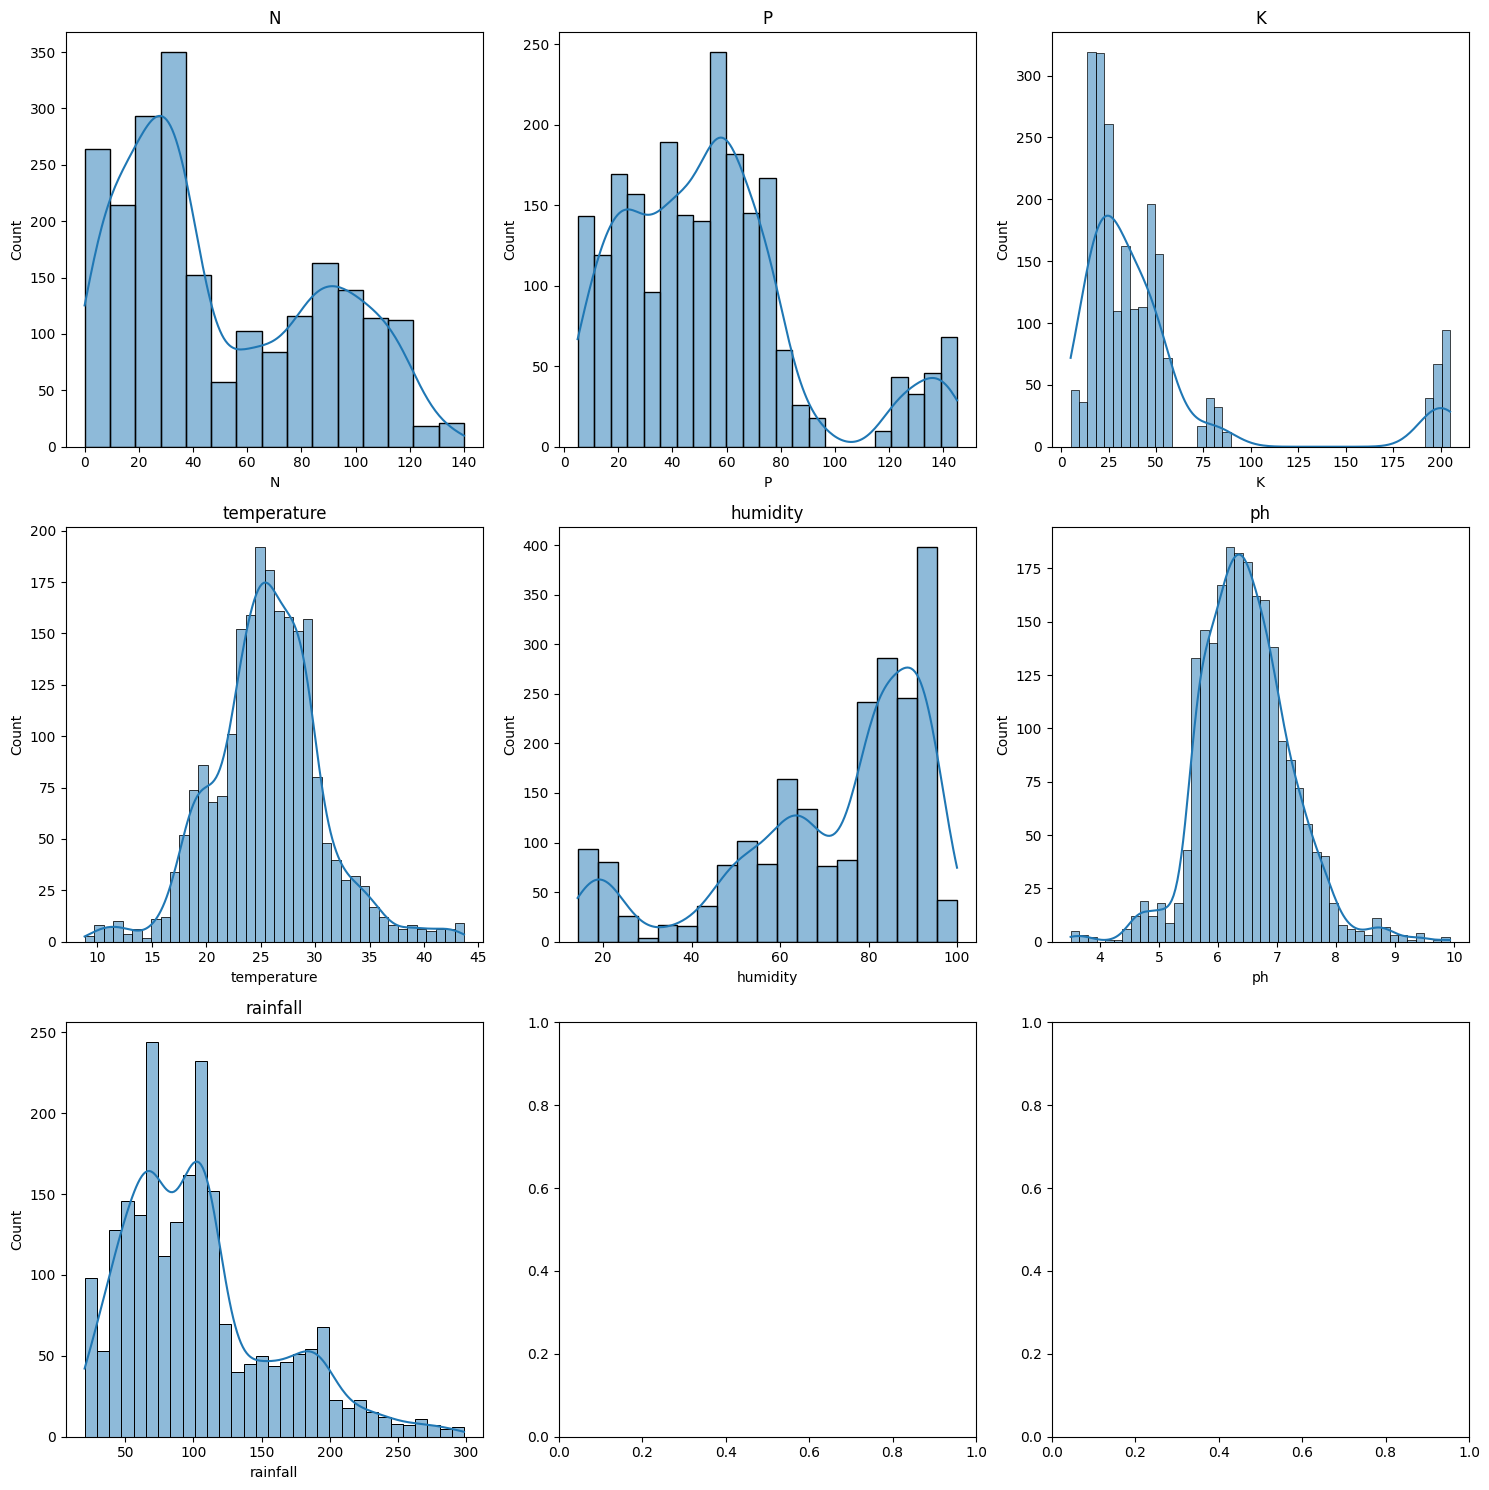

In [20]:
# Visualizing the distribution of each feature
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)

plt.tight_layout()
plt.show()


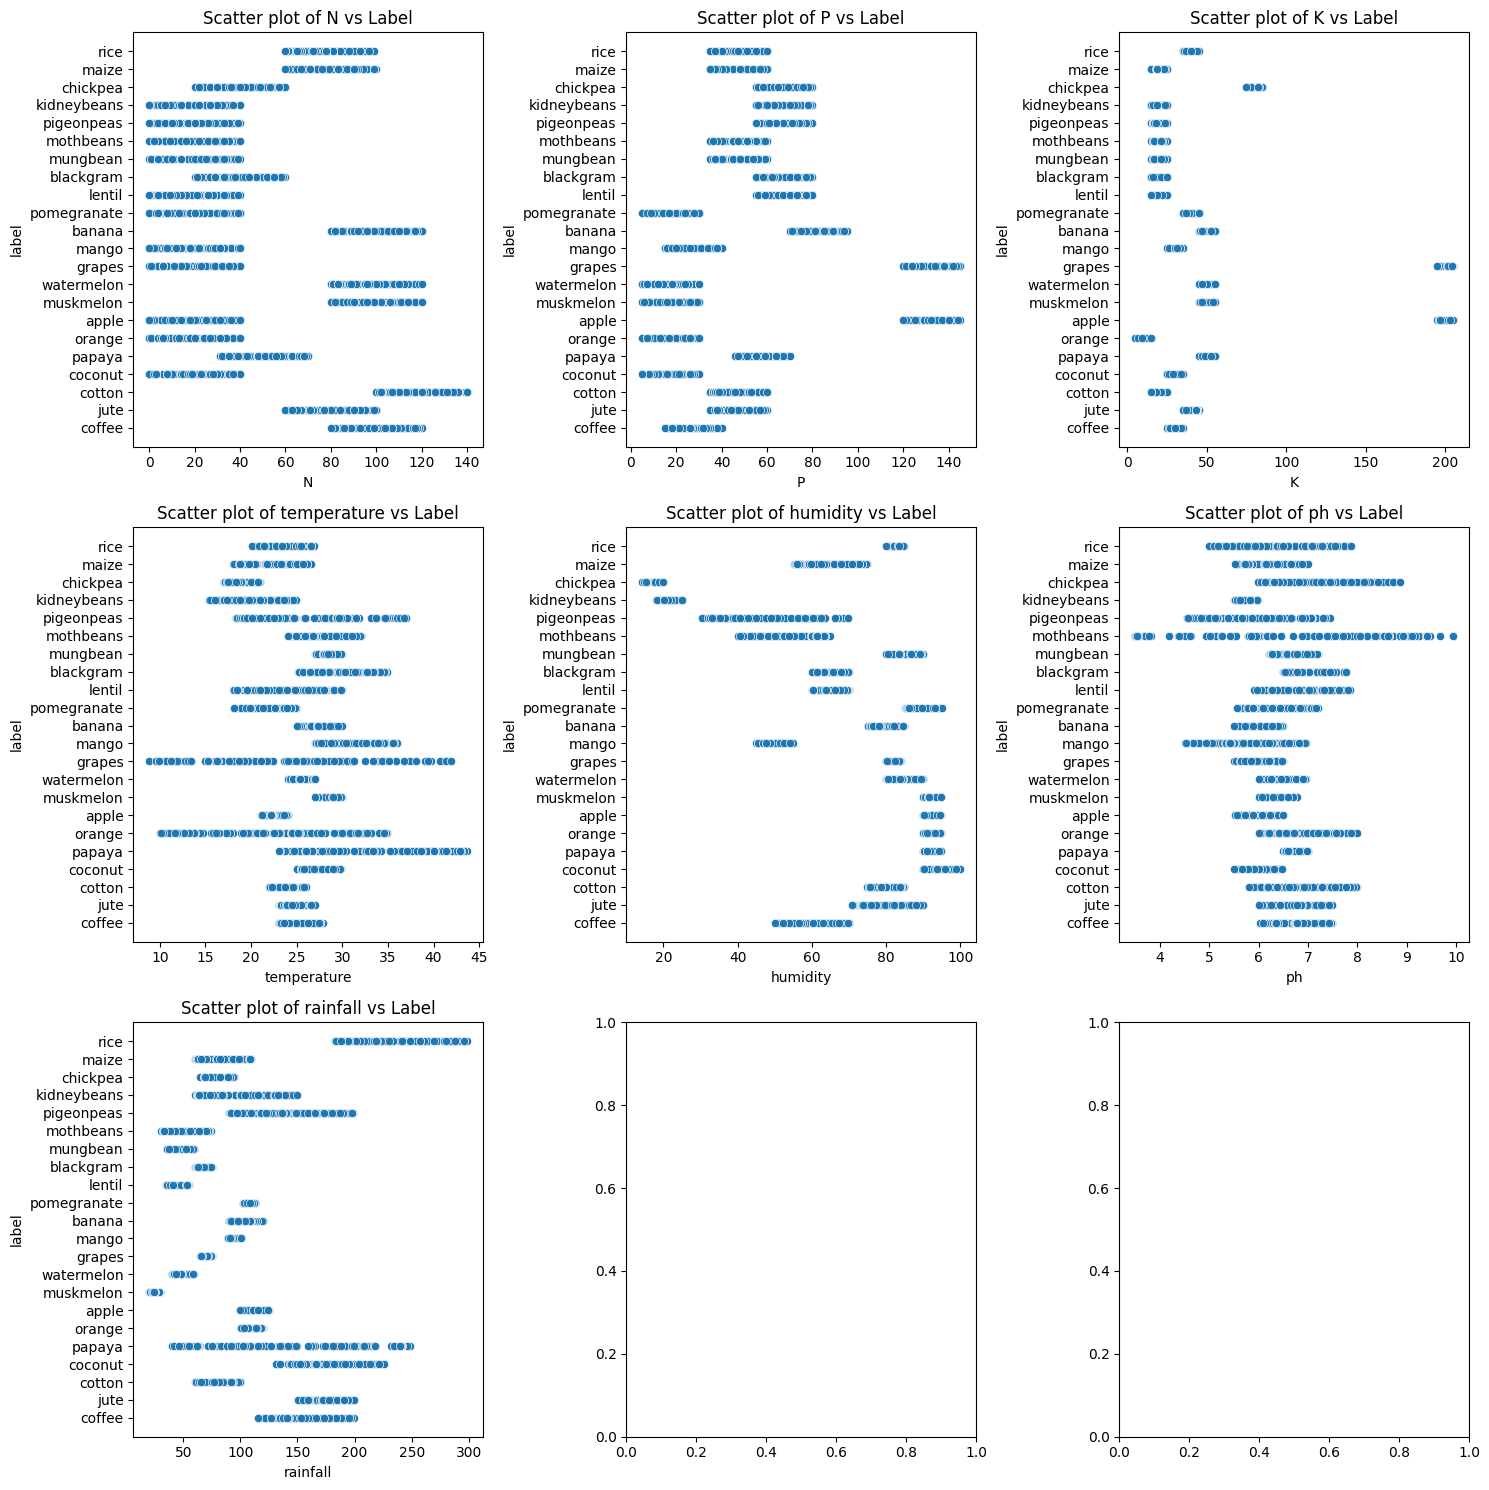

In [25]:
#ploting a scater plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, subplot in zip(features, ax.flatten()):  
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)  
    subplot.set_title(f"Scatter plot of {i} vs Label")  # Optional title

plt.tight_layout()
plt.show()  # Move plt.show() outside the loop


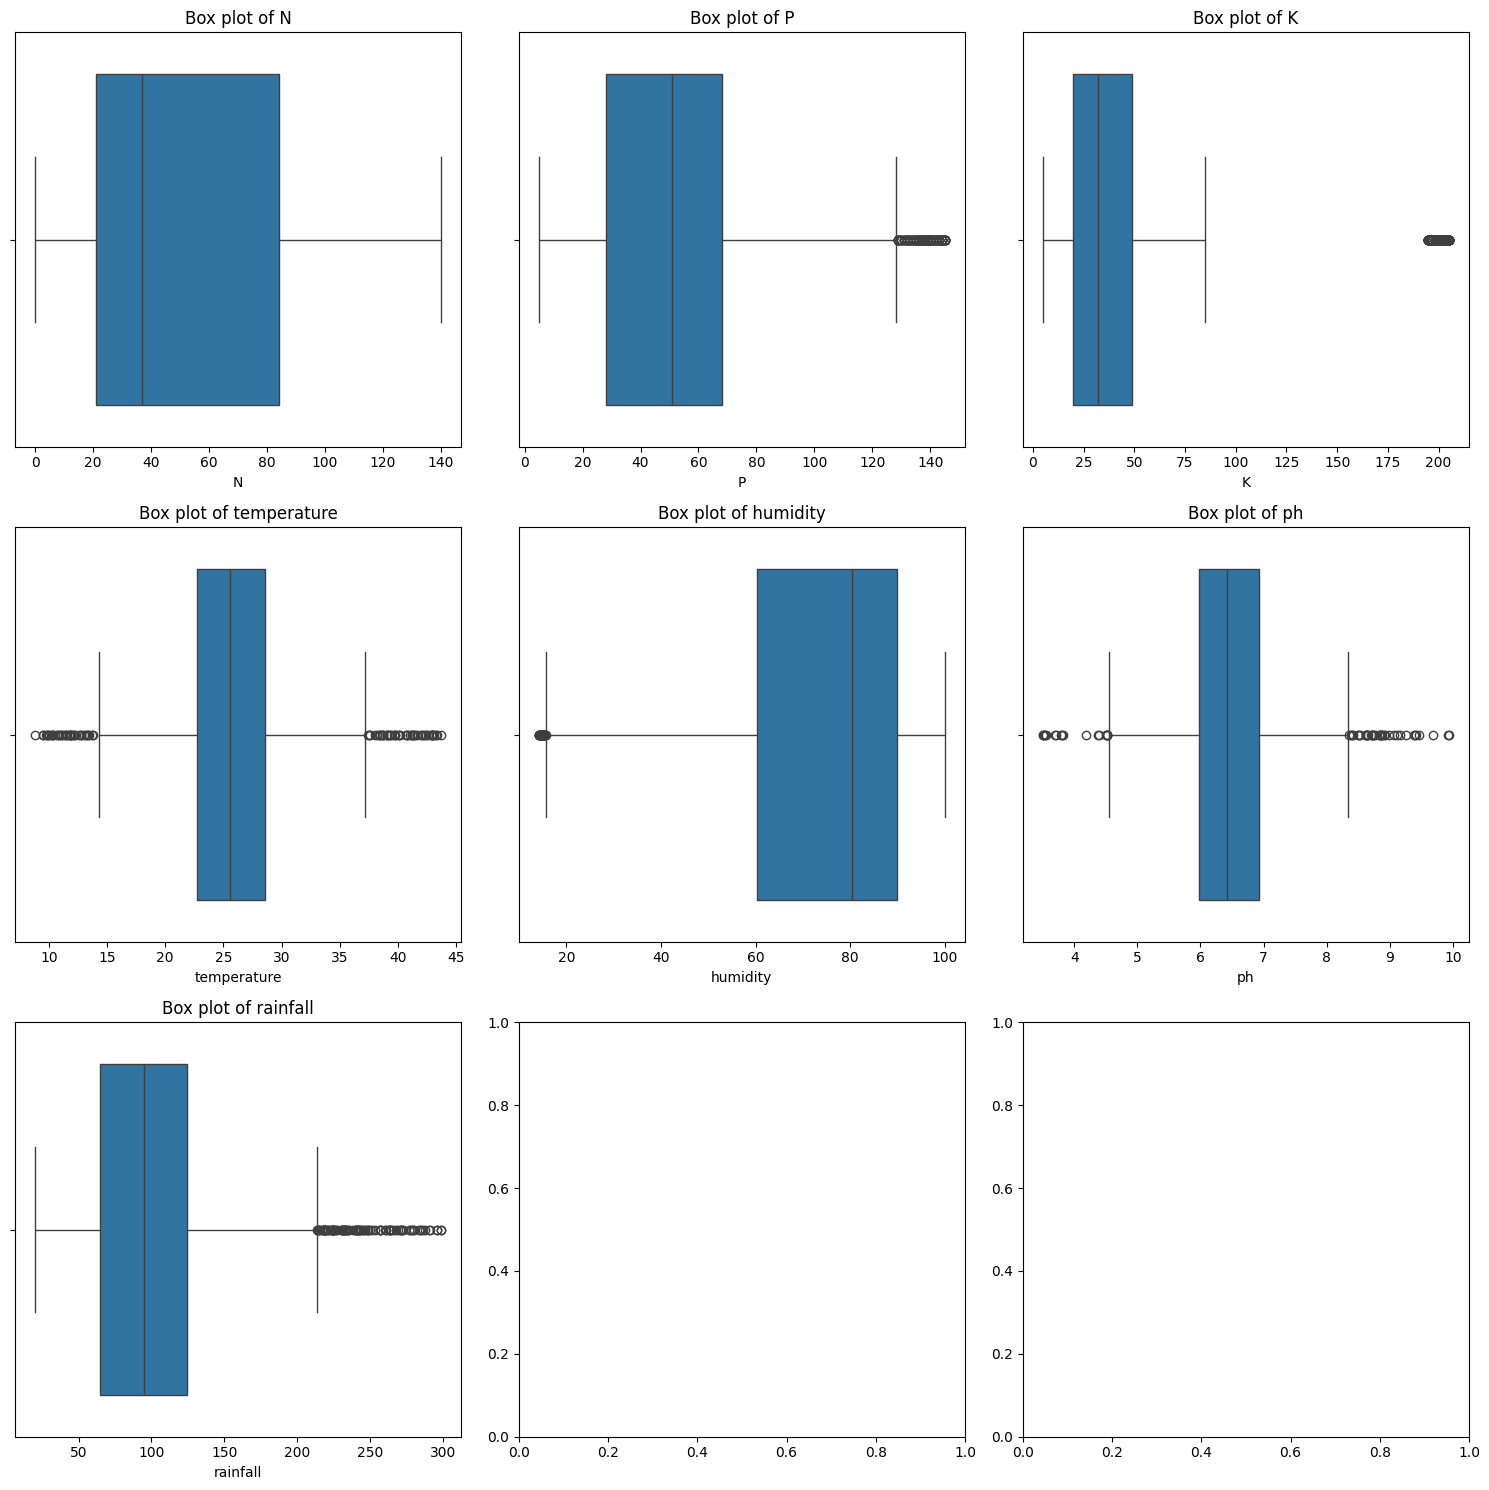

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))  # Fix syntax

for i, subplot in zip(features, ax.flatten()):  
    sns.boxplot(x=crop[i], ax=subplot)  # Fix function syntax
    subplot.set_title(f"Box plot of {i}")  # Optional title for clarity

plt.tight_layout()
plt.show()  

In [30]:
#Correlation of the features

num_cols = crop.select_dtypes(include=[np.number])

num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [31]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

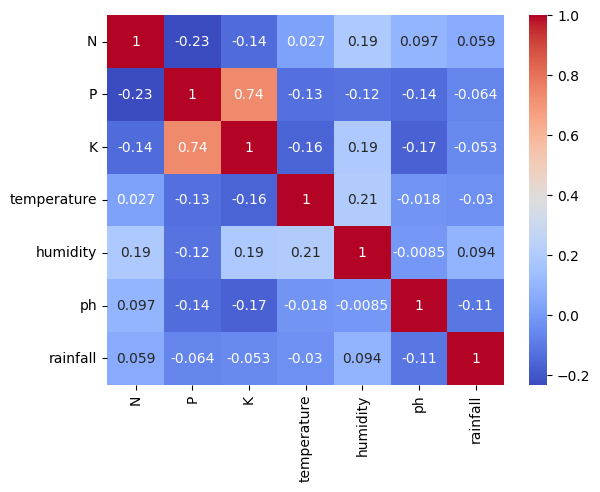

In [35]:
#Viualizing with heat map
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Encoding


In [37]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [39]:
crop_dict= {
    'rice':1 ,
      'maize':2,
        'chickpea':3 ,
          'kidneybeans':4,
            'pigeonpeas':5,
       'mothbeans':6,
         'mungbean':7,
           'blackgram':8,
             'lentil':9,
               'pomegranate':10,
       'banana':11,
         'mango':12, 
         'grapes':13,
           'watermelon':14,
             'muskmelon':15,
               'apple':16,
       'orange': 17,
         'papaya':18,
           'coconut':19,
             'cotton':20,
               'jute':21,
                 'coffee':22
}

In [41]:
crop['crop_no']=crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [42]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


In [46]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

KeyError: "['label'] not found in axis"

In [47]:
print(crop.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop_no'], dtype='object')


In [48]:
print([col for col in crop.columns if 'label' in col.lower()])


[]


In [49]:
crop.tail()


,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


In [1]:
features = crop.columns.to_list()

# Remove 'label' only if it exists
if 'label' in features:
    features.remove('label')

print(features)

# Check actual column names
print(crop.columns.to_list())


NameError: name 'crop' is not defined

In [2]:
import pandas as pd

# Load the dataset (Replace 'your_dataset.csv' with your actual file)
crop = pd.read_csv("dataset/Crop_recommendation.csv")

# Verify the DataFrame
print(crop.head())  # Check the first few rows
print(crop.columns)  # Check available columns


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [3]:
features = crop.columns.to_list()

# Remove 'label' only if it exists
if 'label' in features:
    features.remove('label')

print(features)

# Check actual column names
print(crop.columns.to_list())


['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


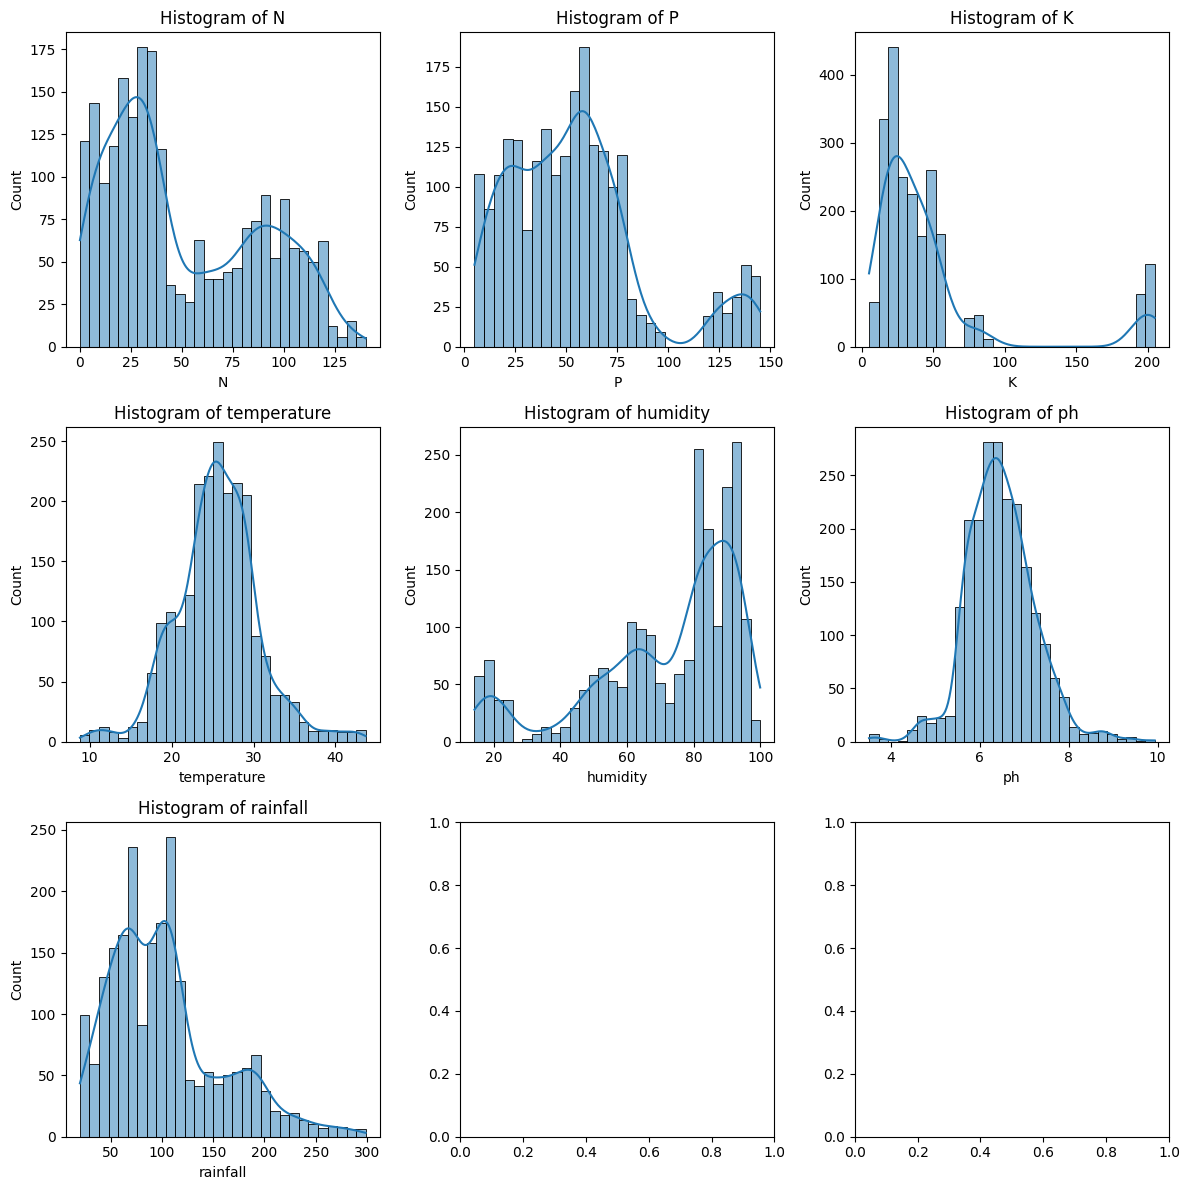

In [4]:
# Visualizing the distribution of each feature
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(12, 12))  # Slightly reduced figure size

for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True, bins=30)  # Added bins for better distribution view
    subplot.set_title(f"Histogram of {i}")

plt.tight_layout()
plt.show()


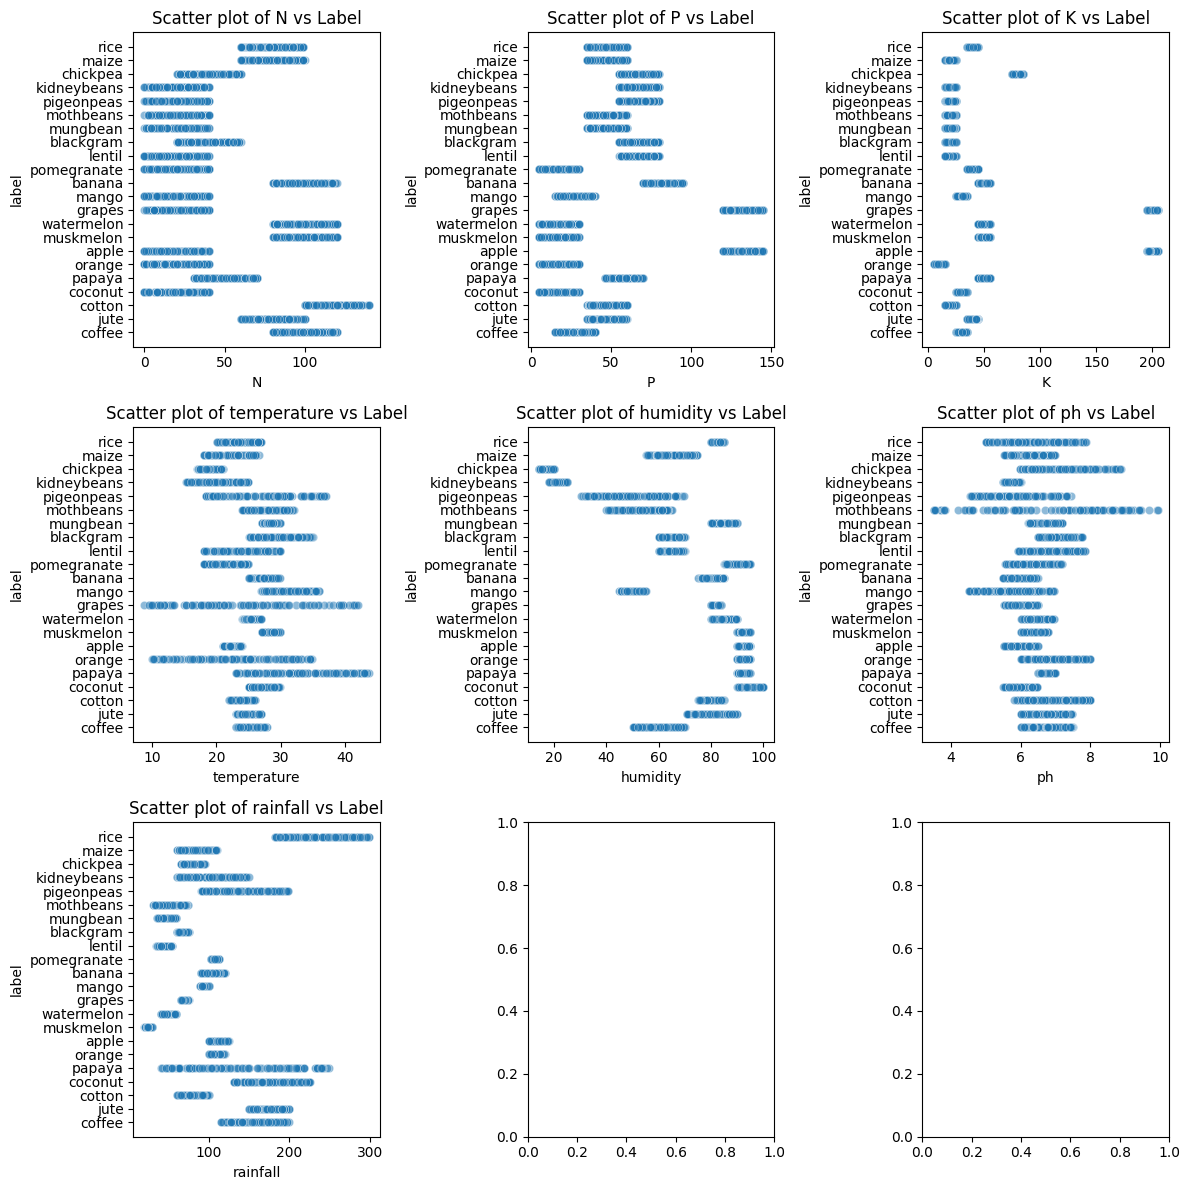

In [5]:
# Plotting a scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(12, 12))

for i, subplot in zip(features, ax.flatten()):  
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot, alpha=0.5, marker="o")  # Added transparency & changed marker
    subplot.set_title(f"Scatter plot of {i} vs Label")

plt.tight_layout()
plt.show()


C:\Users\prata\AppData\Local\Temp\ipykernel_5712\2811539423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=crop[i], ax=subplot, orient="h", palette="coolwarm")  # Horizontal box plot & color palette
C:\Users\prata\AppData\Local\Temp\ipykernel_5712\2811539423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=crop[i], ax=subplot, orient="h", palette="coolwarm")  # Horizontal box plot & color palette
C:\Users\prata\AppData\Local\Temp\ipykernel_5712\2811539423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=crop[i], ax=subplot, 

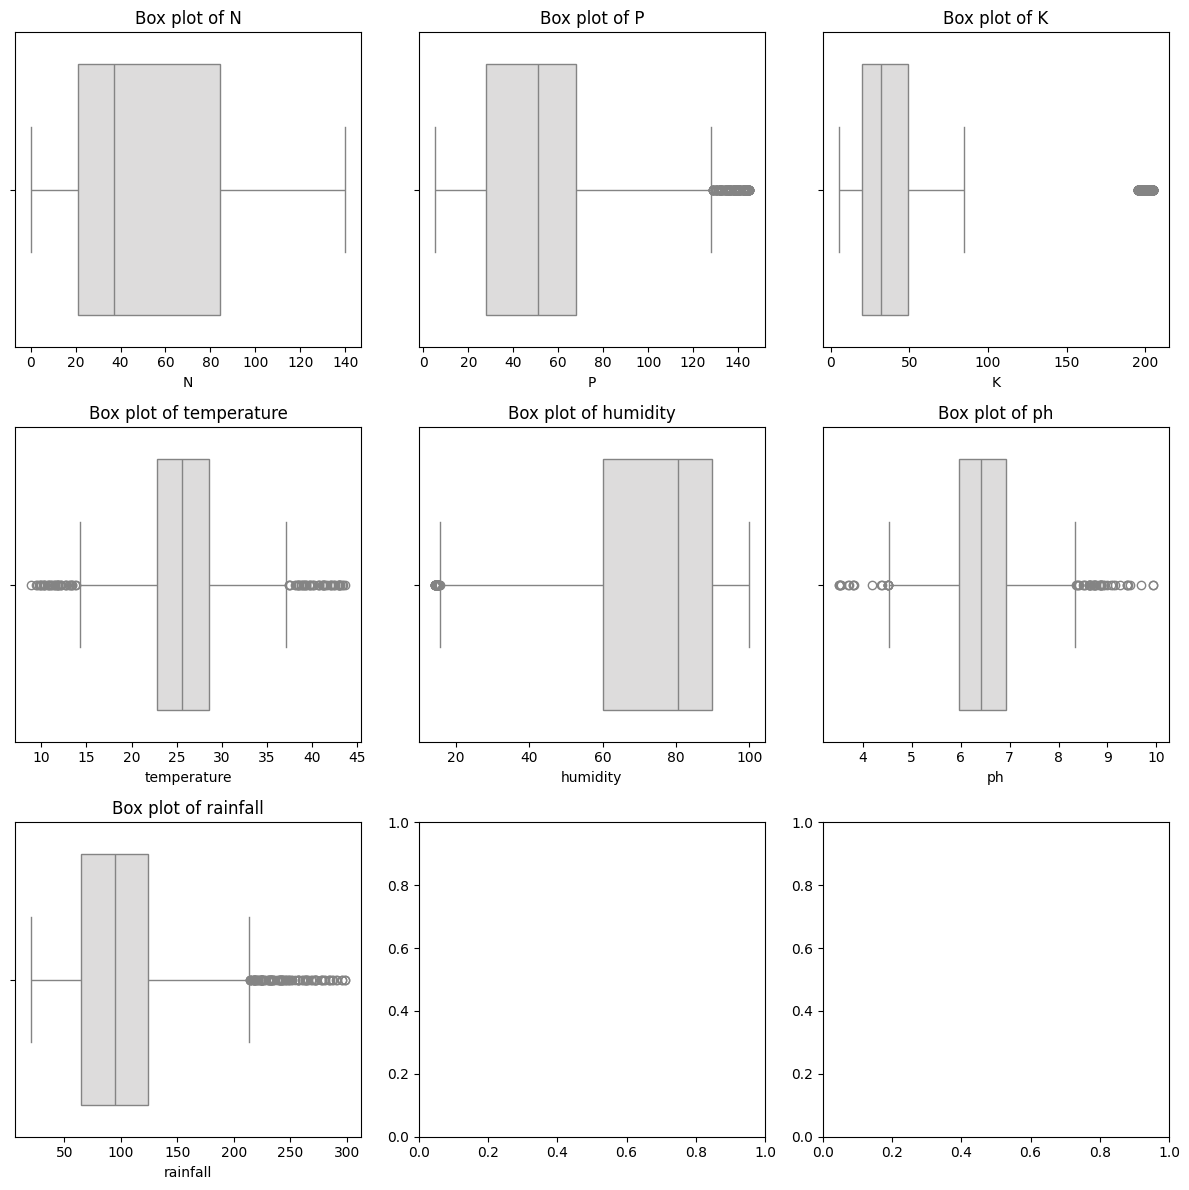

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))  

for i, subplot in zip(features, ax.flatten()):  
    sns.boxplot(x=crop[i], ax=subplot, orient="h", palette="coolwarm")  # Horizontal box plot & color palette
    subplot.set_title(f"Box plot of {i}")

plt.tight_layout()
plt.show()


In [7]:
import numpy as np  # Added missing import

num_cols = crop.select_dtypes(include=[np.number])

num_cols.head()  # Displaying a preview


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


<Axes: >

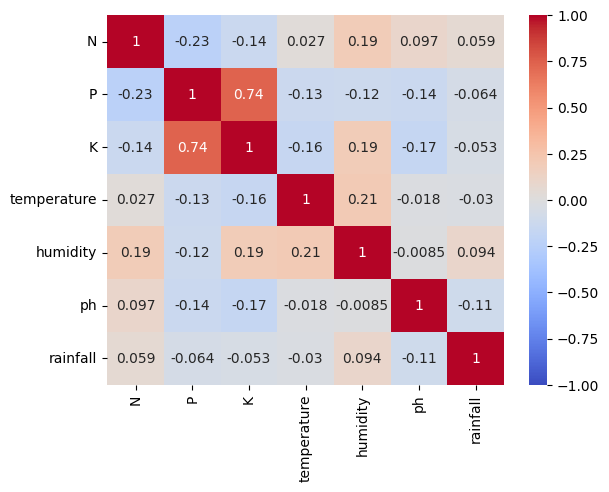

In [8]:
corr = num_cols.corr()

# Visualizing with heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)  # Standardized color range


In [9]:
print(crop['label'].value_counts())  # Shows unique values with counts


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


In [10]:
crop_dict = {
    'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4, 'pigeonpeas': 5,
    'mothbeans': 6, 'mungbean': 7, 'blackgram': 8, 'lentil': 9, 'pomegranate': 10,
    'banana': 11, 'mango': 12, 'grapes': 13, 'watermelon': 14, 'muskmelon': 15,
    'apple': 16, 'orange': 17, 'papaya': 18, 'coconut': 19, 'cotton': 20,
    'jute': 21, 'coffee': 22
}


In [11]:
crop['crop_no'] = crop['label'].map(crop_dict)

# Verify mapping
print(crop[['label', 'crop_no']].head())  # Check if mapping is correct


  label  crop_no
0  rice        1
1  rice        1
2  rice        1
3  rice        1
4  rice        1


In [12]:
crop.drop('label', axis=1, inplace=True, errors='ignore')

print(crop.columns)  # Verify 'label' is removed


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop_no'], dtype='object')


In [13]:
crop.tail() 


,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22
